<img src=https://clipground.com/images/zomato-logo-png-5.jpg style="height:100px; width:300px; float: left">

## Importing libraries

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

## Importing Zomato Dataset and Country Code Dataset

In [2]:
zomato=pd.read_csv('zomato.csv',encoding='latin1')
countries=pd.read_csv('Country-Code.csv')

In [3]:
#sample data from zomato dataset
zomato.sample()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
4408,7329,Green Chick Chop,1,New Delhi,"10 & 12, F-7, Main Road, Kalkaji, New Delhi",Kalkaji,"Kalkaji, New Delhi",77.253761,28.542175,"Raw Meats, North Indian, Fast Food",...,Indian Rupees(Rs.),No,No,No,No,1,3.2,Orange,Average,26


In [32]:
#sample data from countries dataset
countries.sample(4).reset_index(drop=True)

,Country Code,Country
0,208,Turkey
1,94,Indonesia
2,1,India
3,184,Singapore


## Merging Zomato and Country Code Dataset

In [5]:
zomato=pd.merge(zomato,countries,on='Country Code')

In [6]:
zomato.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines


## EDA

In [7]:
zomato.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9551 entries, 0 to 9550
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [8]:
#Checking for null values
zomato.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
dtype: int64

In [9]:
zomato.isnull().sum().sum()

9

In [10]:
#statistical summary of data
zomato.describe(include='all')

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
count,9.551000e+03,9551,9551.000000,9551,9551,9551,9551,9551.000000,9551.000000,9542,...,9551,9551,9551,9551,9551.000000,9551.000000,9551,9551,9551.000000,9551
unique,NaN,7446,NaN,141,8918,1208,1265,NaN,NaN,1825,...,2,2,2,1,NaN,NaN,6,6,NaN,15
top,NaN,Cafe Coffee Day,NaN,New Delhi,"Sector 41, Noida",Connaught Place,"Connaught Place, New Delhi",NaN,NaN,North Indian,...,No,No,No,No,NaN,NaN,Orange,Average,NaN,India
freq,NaN,83,NaN,5473,11,122,122,NaN,NaN,936,...,8393,7100,9517,9551,NaN,NaN,3737,3737,NaN,8652
mean,9.051128e+06,NaN,18.365616,NaN,NaN,NaN,NaN,64.126574,25.854381,NaN,...,NaN,NaN,NaN,NaN,1.804837,2.666370,NaN,NaN,156.909748,NaN
std,8.791521e+06,NaN,56.750546,NaN,NaN,NaN,NaN,41.467058,11.007935,NaN,...,NaN,NaN,NaN,NaN,0.905609,1.516378,NaN,NaN,430.169145,NaN
min,5.300000e+01,NaN,1.000000,NaN,NaN,NaN,NaN,-157.948486,-41.330428,NaN,...,NaN,NaN,NaN,NaN,1.000000,0.000000,NaN,NaN,0.000000,NaN
25%,3.019625e+05,NaN,1.000000,NaN,NaN,NaN,NaN,77.081343,28.478713,NaN,...,NaN,NaN,NaN,NaN,1.000000,2.500000,NaN,NaN,5.000000,NaN
50%,6.004089e+06,NaN,1.000000,NaN,NaN,NaN,NaN,77.191964,28.570469,NaN,...,NaN,NaN,NaN,NaN,2.000000,3.200000,NaN,NaN,31.000000,NaN
75%,1.835229e+07,NaN,1.000000,NaN,NaN,NaN,NaN,77.282006,28.642758,NaN,...,NaN,NaN,NaN,NaN,2.000000,3.700000,NaN,NaN,131.000000,NaN


In [11]:
zomato.sample(5)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
3329,18388132,TiffinToons,1,New Delhi,"A1, New Gupta Colony, Delhi University-GTB Nag...",Delhi University-GTB Nagar,"Delhi University-GTB Nagar, New Delhi",77.194615,28.692486,"North Indian, South Indian",...,No,No,No,No,1,0.0,White,Not rated,0,India
9538,5901782,Starbucks,208,ÛÁstanbul,"Bebek Mahallesi, Cevdetpaôa Caddesi, No 30/A,...",Bebek,"Bebek, ÛÁstanbul",29.043734,41.077696,Cafe,...,No,No,No,No,2,4.9,Dark Green,Excellent,1042,Turkey
4103,302836,Dewan Sweets,1,New Delhi,"1, Pocket F, G-8 Area, Hari Nagar, Jail Road, ...",Jail Road,"Jail Road, New Delhi",77.110838,28.619639,"Desserts, Street Food",...,No,Yes,No,No,1,3.3,Orange,Average,18,India
5152,3043,Shaolin,1,New Delhi,"2/30, Shivalik Geetanjali Road, Malviya Nagar,...",Malviya Nagar,"Malviya Nagar, New Delhi",77.206923,28.534143,Chinese,...,No,Yes,No,No,2,3.4,Orange,Average,217,India
6911,311326,SS ONN THE GO,1,New Delhi,"My Square Food Court, Select City Walk, Saket,...",Saket,"Saket, New Delhi",77.219656,28.529138,Street Food,...,No,No,No,No,2,3.6,Yellow,Good,66,India


## Visualization

### Online Delivery Counts 

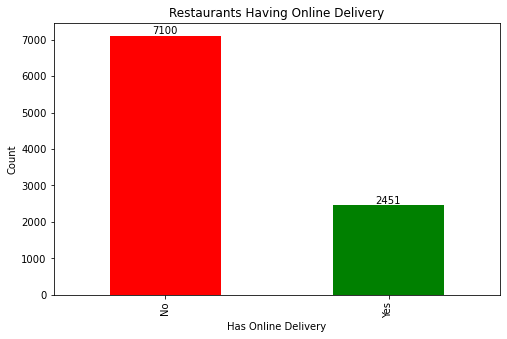

In [19]:
plt.figure(figsize=(8,5))
ax=zomato['Has Online delivery'].value_counts().plot(kind='bar',color=['red','green'])
for i in ax.containers:
    ax.bar_label(i)
plt.xlabel('Has Online Delivery')
plt.ylabel('Count')
plt.title('Restaurants Having Online Delivery')
plt.show()

In [49]:
zomato['Has Online delivery'].value_counts()

No     7100
Yes    2451
Name: Has Online delivery, dtype: int64

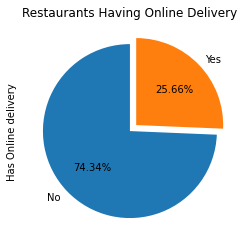

In [22]:
zomato['Has Online delivery'].value_counts().plot(kind='pie',autopct="%0.2f%%",explode=[0,0.1],startangle=90)
plt.title('Restaurants Having Online Delivery')
plt.show()

### Restaurants Having Table Booking in India

In [33]:
#Filtering data for country india
india=zomato[zomato['Country']=='India'].reset_index(drop=True)

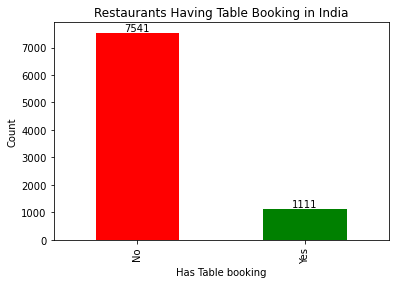

In [26]:
ax=india['Has Table booking'].value_counts().plot(kind='bar',color=['red','green'])
for i in ax.containers:
    ax.bar_label(i)
plt.xlabel('Has Table booking')
plt.ylabel('Count')
plt.title("Restaurants Having Table Booking in India")
plt.show()

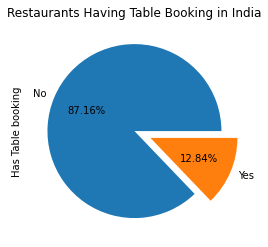

In [16]:
india['Has Table booking'].value_counts().plot(kind='pie',autopct="%0.2f%%",explode=[0,0.2])
plt.title('Restaurants Having Table Booking in India')
plt.show()

### Restaurants With Most Branches in India

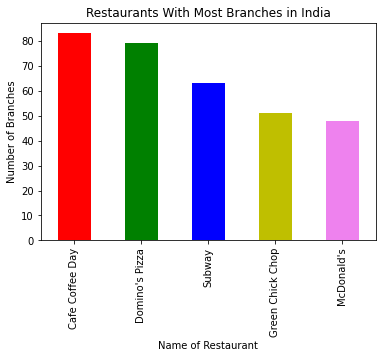

In [17]:
india['Restaurant Name'].value_counts().head().plot(kind='bar',color=['r','g','b','y','violet'])
plt.xlabel('Name of Restaurant')
plt.ylabel('Number of Branches')
plt.title("Restaurants With Most Branches in India")
plt.show()

### Country Wise Online Delivery

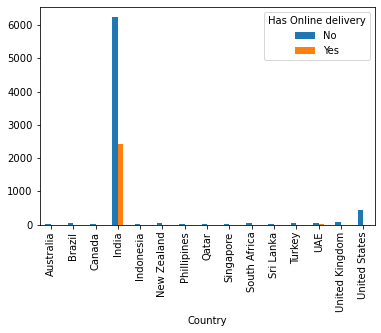

In [18]:
pd.crosstab(zomato['Country'],zomato['Has Online delivery']).plot(kind='bar')
plt.show()

In [27]:
#grouping data by country india
g1=zomato.groupby(zomato['Country'])

In [46]:
#Finding unique cities in india
g1.get_group('India')['City'].unique()

array(['Agra', 'Ahmedabad', 'Allahabad', 'Amritsar', 'Aurangabad',
       'Bangalore', 'Bhopal', 'Bhubaneshwar', 'Chandigarh', 'Chennai',
       'Coimbatore', 'Dehradun', 'Faridabad', 'Ghaziabad', 'Goa',
       'Gurgaon', 'Guwahati', 'Hyderabad', 'Indore', 'Jaipur', 'Kanpur',
       'Kochi', 'Kolkata', 'Lucknow', 'Ludhiana', 'Mangalore', 'Mohali',
       'Mumbai', 'Mysore', 'Nagpur', 'Nashik', 'New Delhi', 'Noida',
       'Panchkula', 'Patna', 'Puducherry', 'Pune', 'Ranchi',
       'Secunderabad', 'Surat', 'Vadodara', 'Varanasi', 'Vizag'],
      dtype=object)

In [34]:
#Displaying all columns using set_option parameter
pd.set_option('display.max_columns',None)
india.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,3400025,Jahanpanah,1,Agra,"E 23, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",78.011544,27.161661,"North Indian, Mughlai",850,Indian Rupees(Rs.),No,No,No,No,3,3.9,Yellow,Good,140,India
1,3400341,Rangrezz Restaurant,1,Agra,"E-20, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",0.000000,0.000000,"North Indian, Mughlai",700,Indian Rupees(Rs.),No,No,No,No,2,3.5,Yellow,Good,71,India
2,3400005,Time2Eat - Mama Chicken,1,Agra,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra Cantt,"Agra Cantt, Agra",78.011608,27.160832,North Indian,500,Indian Rupees(Rs.),No,No,No,No,2,3.6,Yellow,Good,94,India
3,3400021,Chokho Jeeman Marwari Jain Bhojanalya,1,Agra,"1/48, Delhi Gate, Station Road, Raja Mandi, Ci...",Civil Lines,"Civil Lines, Agra",77.998092,27.195928,Rajasthani,400,Indian Rupees(Rs.),No,No,No,No,2,4.0,Green,Very Good,87,India
4,3400017,Pinch Of Spice,1,Agra,"23/453, Opposite Sanjay Cinema, Wazipura Road,...",Civil Lines,"Civil Lines, Agra",78.007553,27.201725,"North Indian, Chinese, Mughlai",1000,Indian Rupees(Rs.),No,No,No,No,3,4.2,Green,Very Good,177,India


### Cities and Restaurant Count

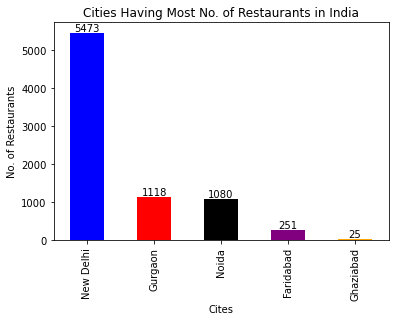

In [35]:
ax=india['City'].value_counts().head(5).plot(kind='bar',color=['b','r','k','purple','orange'])
for i in ax.containers:
    ax.bar_label(i)
plt.title("Top 5 Cities Having Most No. of Restaurants in India")
plt.xlabel('Cites')
plt.ylabel('No. of Restaurants')
plt.show()

### Average cost for two for Restaurants in India

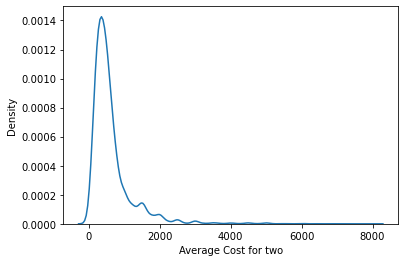

In [62]:
sns.kdeplot(data=india,x='Average Cost for two')
plt.show()

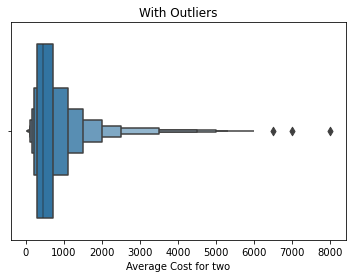

In [34]:
sns.boxenplot(data=india,x='Average Cost for two')
plt.title('With Outliers')
plt.show()

In [67]:
print("Average Cost for Two persons in India:-",india['Average Cost for two'].aggregate('mode')[0])

Average Cost for Two persons in India:- 500


### Restaurant Count Per Country

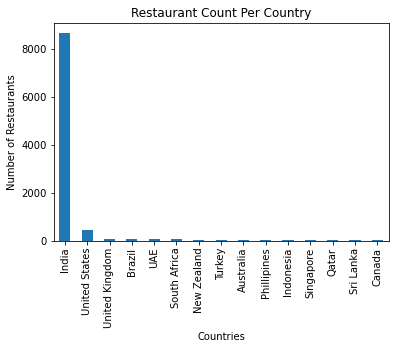

In [38]:
zomato['Country'].value_counts().plot(kind='bar')
plt.title("Restaurant Count Per Country")
plt.xlabel("Countries")
plt.ylabel("Number of Restaurants")
plt.show()

### Top 5 Cuisines in india

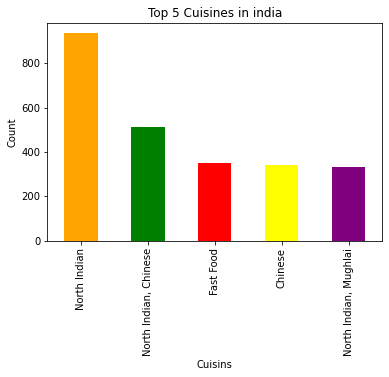

In [39]:
india['Cuisines'].value_counts().head().plot(kind='bar',color=['orange','green','red','yellow','purple'])
plt.xlabel('Cuisins')
plt.ylabel('Count')
plt.title('Top 5 Cuisines in india')
plt.show()

### Most Rated Restaurants in India

In [41]:
aggr=india.sort_values(['Aggregate rating','Votes'],
                       ascending=[False,False]).groupby(['Restaurant Name','Aggregate rating']).head(10)

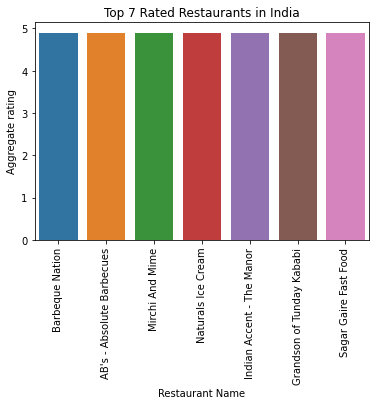

In [42]:
x=sns.barplot(data=aggr.head(10),x='Restaurant Name',y='Aggregate rating')
plt.title("Top 7 Rated Restaurants in India")
for item in x.get_xticklabels():
    item.set_rotation(90)
plt.show()

### Restaurants Having Online Delivery in India

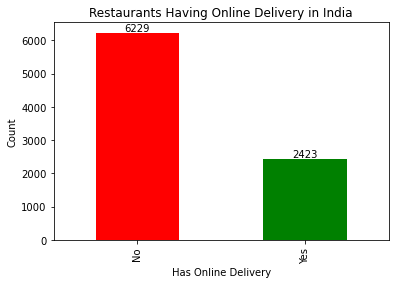

In [77]:
ax=india['Has Online delivery'].value_counts().plot(kind='bar',color=['red','green'])
plt.xlabel('Has Online Delivery')
plt.title('Restaurants Having Online Delivery in India')
plt.ylabel('Count')
for i in ax.containers:
    ax.bar_label(i)
plt.show()

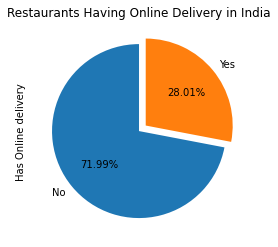

In [79]:
india['Has Online delivery'].value_counts().plot(kind='pie',autopct="%0.2f%%",explode=[0,0.1],startangle=90)
plt.title('Restaurants Having Online Delivery in India')
plt.show()

## By Visualizing the data we get to know about some useful insights like:
* From the given group of countries **India** has most restaurants, so company should focus on expanding its business in India.  
* Even though India has lots of restaurants, very few restaurants have feature of **online delivery**.   
* Among the cities in India **New Delhi** has highest number of restaurants.  
* **North Indian Cuisines** are in high demand in India.   

## After Analyzing above insights company should focus on following points:
* As large number of Restaurants is not using online delivery yet, company need to focus on collaborating with these restaurants in order to expand business.
* As New Delhi has highest number of restaurants, company must try to collaborate with these restaurants and it should also appoint big group of delivery boys in order to handle all the deliveries in New Delhi area.
* Local cuisines like North Indian are preferred by large group of individuals. so company should provide some discount on these dishes in order to attract large group of individuals.

## Thank You For Visiting